 ---
 # Prática 3: Analisis en el dominio de la frecuencia, del circuito de primer orden RC serie
 ---
> Autores: Jorge del Rio Lopez, Carlos Gonzalez Garcia y Javier Rodriguez Urbano.
>
> Fecha:2024-10-29
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


En esta práctica se estudian las configuraciones inversora y no inversora del amplificador operacional, obteniendo valores como la ganancia y estudiando propiedades como la saturación.

In [80]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
Pi = 3.141592653589793

In [81]:
xlsx_name="P3_PlantillaMedidasEstudiantes.ods" #Importamos el fichero que contiene los datos.

In [82]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)
def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100

---
<h1 style="text-align: center;">[P3.C1]</h1>

---
El módulo y el argumento de la expresiones:

$\~{T_C}\ =\ \dfrac{\~{V_C}(f)}{\~{V_s}(f)}\ =\ \dfrac{1}{1+ j\omega RC}$

$\~{T_R}\ =\ \dfrac{\~{V_R}(f)}{\~{V_s}(f)}\ =\ \dfrac{j\omega RC}{1+ j\omega RC}$


se obtiene de la siguiente forma.


$ \~{T_C} = \left\{ \begin{array}{lr} |\~{T_C}| = \dfrac{1}{\sqrt{R^2C^2\omega^2\ +\ 1}}  & Módulo\\ \Phi\ =\ atan(-\omega RC) & Argumento \end{array} \right. $

$\~{T_R}= \left\{ \begin{array}{lr} |\~{T_R}| = \sqrt{\dfrac{R^2C^2\omega^2}{R^2C^2\omega^2\ +\ 1}} & Módulo\\ \Phi\ =\ atan(\dfrac{1}{\omega RC}) & Argumento\end{array} \right. $

---
<h1 style="text-align: center;">[P3.C2]</h1>

---

Primero medimos los valores de las resistencias con las que vamos a trabajar.

In [83]:
#Extraemos los valores de las resistencias.
DatosResistenciaCondensador = pd.read_excel(xlsx_name,sheet_name='P3C2',usecols='A:B')
Rmedida=DatosResistenciaCondensador["R"].tolist()
CMedida=DatosResistenciaCondensador["C"].tolist()

print(f'Las medidas de las resistencias y las capacidades son: \nR1 Teorico: {Rmedida[0]} Ohms   R1 Práctico: {Rmedida[1]} Ohms')
print(f'R2 Teorico: {CMedida[0]} F   R2 Práctico: {CMedida[1]} F')
Rmedida,Cmedida = ConverArray2(Rmedida,CMedida)


Las medidas de las resistencias y las capacidades son: 
R1 Teorico: 2200 Ohms   R1 Práctico: 2140 Ohms
R2 Teorico: 2.2e-08 F   R2 Práctico: 2.1949999999999998e-08 F


---
<h1 style="text-align: center;">[P3.C3]</h1>

---


In [84]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='P3C3',usecols='A:D')#Recogemos los datos del excel.

FrecuenciaExp = DatosTarea1["FreqHz"].tolist()
VoltajeFuente = DatosTarea1["Vfuente"].tolist()
VoltajeC = DatosTarea1["Vc"].tolist()
Fase = DatosTarea1["dt"].tolist()

---
<h1 style="text-align: center;">[P3.C4]</h1>

---


En este apartado nos encargaremos de mostrar los diagramas de Bode, además de ver la diferencia de los modulos de Tc y Tr experimental y teórico.

In [85]:
#Definimos las variables que usaremos en esta parte.

Tcexp = [] # Lista que tomara los valores del modulo de Tc para los valores experimentales.
Trexp = [] # Lista que tomara los valores del modulo de Tr para los valores experimentales.

Tcteo = [] # Lista que tomara los valores del modulo de Tc para los valores teóricos.
Trteo = [] # Lista que tomara los valores del modulo de Tr para los valores teóricos.
FrecTeo = [] # Lista que tomara los valores de la frecuencia teórica

EpsilonC = [] # Lista que tomara los valores del error relativo entre Tc exp y Tc teor
EpsilonR = [] # Lista que tomara los valores del error relativo entre Tr exp y Tr teor

FaseExpC = [] # Lista que tomara los valores de la fase experimental en el Condensador
FaseExpR = [] # Lista que tomara los valores de la fase experimental en la Resistencia
FaseTeoC = [] # Lista que tomara los valores de la fase teórica
FaseTeoR = [] # Lista que tomara los valores de la fase teórica

In [86]:
#Tranformamos las listas de los datos experimentales en arrays.
FrecuenciaExp , VoltajeFuente = ConverArray2(FrecuenciaExp,VoltajeFuente)
VoltajeC , Fase = ConverArray2(VoltajeC , Fase)

#---------------------------------------------------------------------------------------------------------------------------------
#Calculo del Modulo de Tc y Tr experimental
#---------------------------------------------------------------------------------------------------------------------------------
# Definimos el valor de RC experimental
RCexp = Rmedida[1] * CMedida[1] 
# De aqui sacamos las frecuencias angulares experimentales
FrecuenciaAngular = FrecuenciaExp.copy()*(2*Pi)

for i in FrecuenciaAngular:# En este bucle calculamos el modulo de Tc y Tr con la ecuacion de P3C1
    i = float(i)
    valorC = 1 / (math.sqrt((RCexp*i)**2 + 1))
    valorR = (RCexp*i) * (1 / (math.sqrt((RCexp*i)**2 + 1)))
    # Lo guardamos en las listas correspondientes.
    Tcexp.append(valorC)
    Trexp.append(valorR)

#Calculo de la fase experimental
j = 0
for i in FrecuenciaExp:
    FaseExpC.append(2*Pi*i*Fase[j])
    j += 1
    
#---------------------------------------------------------------------------------------------------------------------------------
#Calculo del Modulo de Tc y Tr teórico
#---------------------------------------------------------------------------------------------------------------------------------
# Definimos el valor de RC teórico
RCteo = Rmedida[0] * CMedida[0]
#Ahora calculamos las frecuencias teóricas para su posterior calculo de Tc y Tr teórico.
FrecuenciaTeo = [100]
var = 100
var1 =0
for i in range(1,28):
    var1 += var
    if var1/var > 9: 
        var *= 10
    FrecuenciaTeo.append(FrecuenciaTeo[i-1] + var)
FrecuenciaTeo.extend([110000,120000,130000,140000])
FrecuenciaTeo = np.array(FrecuenciaTeo)
# Calculamos las frecuencias angulares teóricas
FrecuenciaAngularTeo = FrecuenciaTeo.copy() * (2*Pi)

for i in FrecuenciaAngularTeo: #En este bucle calculamos el modulo de Tc y Tr con la ecuacion de P3C1
    valorC = 1 / (math.sqrt((RCteo*i)**2 + 1))
    valorR = (RCteo*i) * (1 / (math.sqrt((RCteo*i)**2 + 1)))
    Tcteo.append(valorC)
    Trteo.append(valorR)
for i in range(0,len(Tcteo)):
    EpsilonC.append(ErrorRelativo(Tcexp[i],Tcteo[i]))
    EpsilonR.append(ErrorRelativo(Trexp[i],Trteo[i]))
#Ponemos los datos en una tabla.
data = {'Tc Exper.': Tcexp,
        'Tc Teóri.': Tcteo,
        'Epsilon C (%)': EpsilonC,
        'Tr Exper.': Trexp,
        'Tr Teóri.': Trteo,
        'Epsilon R (%)': EpsilonR,
        }
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')


Datos:
    Tc Exper.  Tc Teóri.  Epsilon C (%)  Tr Exper.  Tr Teóri.  Epsilon R (%)
0    0.999560   0.999538       0.002248   0.029649   0.030397       2.460896
1    0.998263   0.998156       0.010743   0.058920   0.060709       2.947627
2    0.995947   0.995864       0.008274   0.089947   0.090855       0.999123
3    0.993137   0.992683       0.045817   0.116953   0.120752       3.146621
4    0.989286   0.988637       0.065708   0.145989   0.150325       2.884576
5    0.984580   0.983758       0.083568   0.174935   0.179500       2.543467
6    0.979204   0.978084       0.114443   0.202880   0.208209       2.559671
7    0.972982   0.971658       0.136221   0.230881   0.236390       2.330224
8    0.966626   0.964526       0.217718   0.256191   0.263987       2.953188
9    0.958946   0.956738       0.230737   0.283589   0.290950       2.529862
10   0.860941   0.854382       0.767714   0.508705   0.519646       2.105471
11   0.745413   0.738752       0.901583   0.666603   0.673977       1

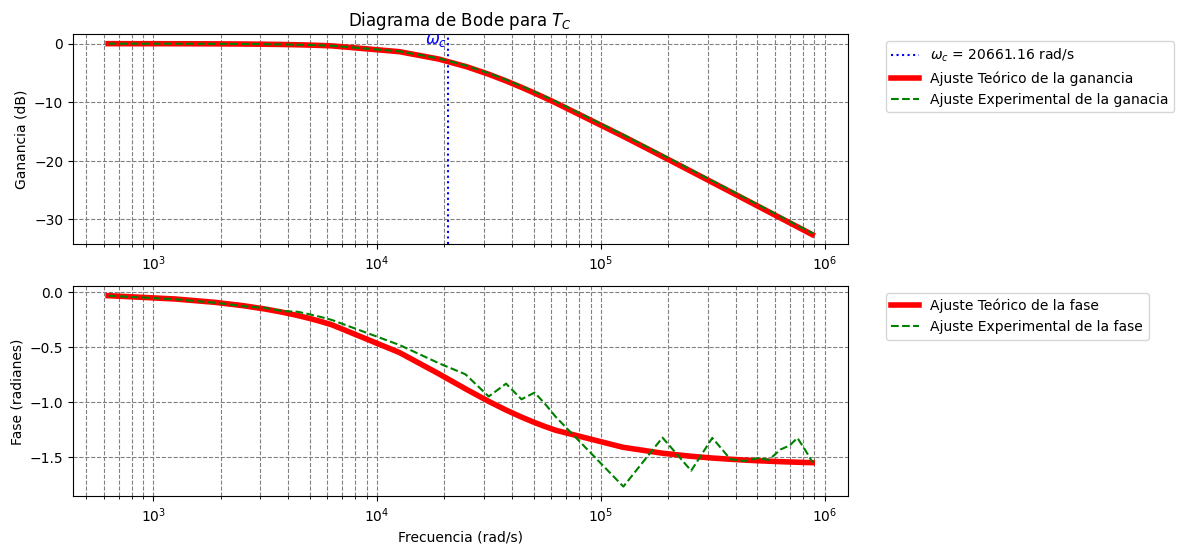

In [87]:
#---------------------------------------------------------------------------------------------------------------------------------
#Diagrama de Bode Experimental y Teórico de Tc
#---------------------------------------------------------------------------------------------------------------------------------

# Datos para el Experimental

GananciaExpC = []# Esta lista tomara el valor de la ganancia experimental.
for i in Tcexp: 
    GananciaExpC.append(20 * math.log10(abs(i)))

#Datos para el Teórico

GananciaTeoC = []# Esta lista tomara el valor de la ganancia teórica.
for i in Tcteo: 
    GananciaTeoC.append(20 * math.log10(abs(i)))
# En este bucle calcularesmos la fase del Tc
for i in FrecuenciaAngularTeo: 
    i = float(i)
    FaseTeoC.append(math.atan(-i*RCteo))


# Graficar el Bode - Magnitud (dB)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c$ = {1/RCteo:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoC,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpC,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode para $T_C$")
plt.ylabel("Ganancia (dB)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngularTeo,FaseTeoC ,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpC,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()
    

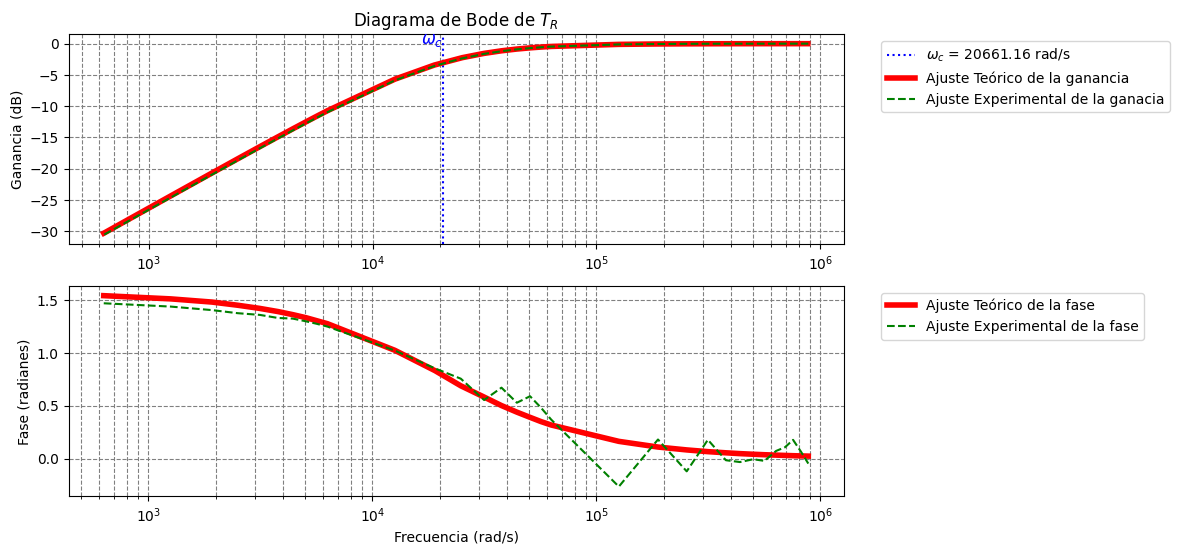

In [88]:
#---------------------------------------------------------------------------------------------------------------------------------
#Diagrama de Bode Experimental y Teórico de Tr
#---------------------------------------------------------------------------------------------------------------------------------

# Datos para el Experimental

GananciaExpR = []# Este litsa tomara el valor de la ganancia experimental.
for i in Trexp: 
    GananciaExpR.append(20 * math.log10(abs(i)))
FaseExpR = [] # Esta lista tomara la fase de la resistencia
j=0
for i in FaseExpC:
    FaseExpR.append(1.5+i)#PELIGROOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO ARREGLOTEMPORAL
    j+=1
#Datos para el Teórico

GananciaTeoR = []# Este litsa tomara el valor de la ganancia teórica
for i in Trteo: 
    GananciaTeoR.append(20 * math.log10(abs(i)))
#Calculamos la fase teórica
for i in FrecuenciaAngularTeo: 
    i = float(i)
    FaseTeoR.append(math.atan(1/(i*RCteo)))



# Graficar el Bode - Magnitud (dB)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(1/RCteo, color='blue', linestyle=':', label=fr"$\omega_c$ = {1/RCteo:.2f} rad/s")
plt.text(1/RCteo, plt.gca().get_ylim()[1] * 0, r"$\omega_c$",color="blue", fontsize=12, ha="right",va='baseline')
plt.semilogx(FrecuenciaAngularTeo, GananciaTeoR,label="Ajuste Teórico de la ganancia",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, GananciaExpR,label='Ajuste Experimental de la ganacia',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.title(r"Diagrama de Bode de $T_R$")
plt.ylabel("Ganancia (dB)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (grados)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngular, FaseTeoR,label="Ajuste Teórico de la fase",color="red",lw=4)  # Gráfica semilogarítmica
plt.semilogx(FrecuenciaAngular, FaseExpR,label='Ajuste Experimental de la fase',color='green',linestyle='--')  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel("Frecuencia (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


plt.show()

---
<h1 style="text-align: center;">[P3.C5]</h1>

---

Tras ver los diagramas podemos concluir que el circuito funciona como un filtro, como se observa el condesador funciona como un filtro pasabaja, mientras que la resistencia funciona como una filtro pasaalta.

Para verificar esto además del diagrama hemos trabajado sobre las ecuaciones de $T_R$ y $T_C$,mostradas en P3C1, para ver si se asemejaban a algún filtro:

$\~{T_C}\ =\ \dfrac{1}{1+ j\omega RC}\ =\ \dfrac{\dfrac{1}{R\ C}}{\dfrac{1}{R\ C} + j\omega}\ =\boxed{\dfrac{1}{RC}\ =
 \omega_C}\ = \dfrac{\omega_c}{\omega_c + s} $ que es la ecuacion de un filtro pasabaja

$\~{T_R}\ =\ \dfrac{j\omega RC}{1+ j\omega RC}\ =\ \dfrac{j\omega}{\dfrac{1}{R\ C} + j\omega}\ =\boxed{\dfrac{1}{RC}\ =
 \omega_c}\ = \dfrac{s}{\omega_c + s} $ que es la ecuacion de un filtro pasaalta


---
<h1 style="text-align: center;">[P3.C6]</h1>

---

Conociendo la relación entre el voltaje de la resistencia y el del circuito y condensador, obtenemos la ecuación
$\overline{V}_R = \overline{V}_S - \overline{V}_c$ <br>
Además, sabemos que $\overline{V}_C = \dfrac{\overline{V}_S}{j\omega RC+1}$. Podemos obtener en consecuencia $V_R$ en función de $V_S$:

 $\overline{V}_R = \overline{V}_S\left(\dfrac{j\omega RC}{j \omega RC + 1}\right)$ <br>

### Altas frecuencias

Para altas frecuencias, es decir, en caso $\omega RC \gg 1$, o lo que es lo mismo $\omega RC \rightarrow \infty$, obtenemos lo siguiente <br> <br>
$\overline{V}_R \medspace (\omega RC \rightarrow \infty) \rightarrow \overline{V}_S$ <br> <br>

Para frecuencias altas el condensador tiende a actuar casi como un cortocircuito porque su voltaje tiende a no variar respecto del introducido. Por tanto, el voltaje de salida será el de la resistencia ya que en el condensador casi no varía (y el de la resistencia tiende a caer $\overline{V}_S$, como nos indica el limite). Esto significa que el condensador tiene un comportamiento derivador.

Para altas frecuencias en los terminales del condensador observamos que apenas cambia la señal respecto a la de entrada porque funciona como cortocircuito.

### Bajas frecuencias
Ahora para frecuencias cercanas a 0, escrito matemáticamente como: $\omega RC \ll 1$ o también $\omega RC \rightarrow 0$, podemos calcular: <br> <br>

$\overline{V}_R \medspace (\omega RC \rightarrow 0) \rightarrow 0$ <br> <br>

Es decir, para bajas frecuencias el condensador actúa como un abierto, por tanto, la mayor parte de la corriente cae en el condensador, que será el voltaje de salida. Esto es un comportamiento integrador.

Para bajas frecuencias en los terminales de la resistencia observamos tambien pulsos cuadrados porque tiende a variar muy poco el voltaje en la misma (tiende a 0)

COMPLETAR CON LOS GRAFICOS Y UN POCO MAS DE EXPLICACION SOBRE EL MISMO.

---
<h1 style="text-align: center;">[P3.C7]</h1>

---